# 6.3. Zbiór danych: Titanic

Wykorzystamy zbiór, który jest dość popularny w tutorialach Data Science. Zawiera on informacje o pasażerach Titanica wraz z oznaczeniem tego czy dany pasażer przetrwał katastrofę.

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("../data/titanic/titanic.csv")
titanic_df.sample(n=5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
491,0,3,Mr. Edward Roland Stanley,male,21.0,0,0,8.0500
803,0,3,Miss. Ellen Natalia Pettersson,female,18.0,0,0,7.7750
452,1,3,Mr. Ivan Jalsevac,male,29.0,0,0,7.8958
209,0,3,Mr. Ahmed Ali,male,24.0,0,0,7.0500
169,0,1,Mr. Wyckoff Van der hoef,male,61.0,0,0,33.5000


In [3]:
titanic_df.shape

(887, 8)

## Analiza dostarczonych danych

Przejdziemy przez cały proces przygotowania danych do modelowania, ale na początek warto nabrać pewnych intuicji do zbioru. Do tego celu wyświetlimy sobie kilka statystyk, zarówno w formie graficznej jak i statystyk opisowych.

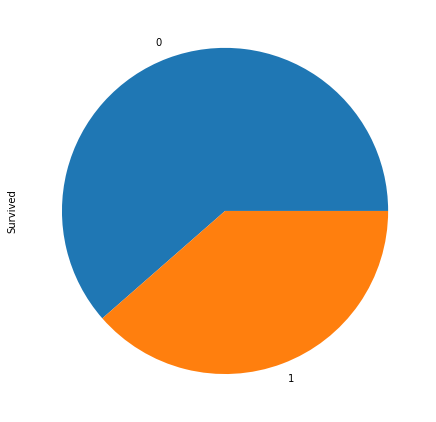

In [4]:
titanic_df["Survived"].value_counts() \
    .plot \
    .pie(figsize=(10.0, 7.5))

In [5]:
titanic_df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [6]:
titanic_df.groupby(["Pclass", "Survived"]) \
    .count()

Name  Sex  Age  Siblings/Spouses Aboard  \
Pclass Survived                                            
1      0           80   80   80                       80   
       1          136  136  136                      136   
2      0           97   97   97                       97   
       1           87   87   87                       87   
3      0          368  368  368                      368   
       1          119  119  119                      119   

                 Parents/Children Aboard  Fare  
Pclass Survived                                 
1      0                              80    80  
       1                             136   136  
2      0                              97    97  
       1                              87    87  
3      0                             368   368  
       1                             119   119

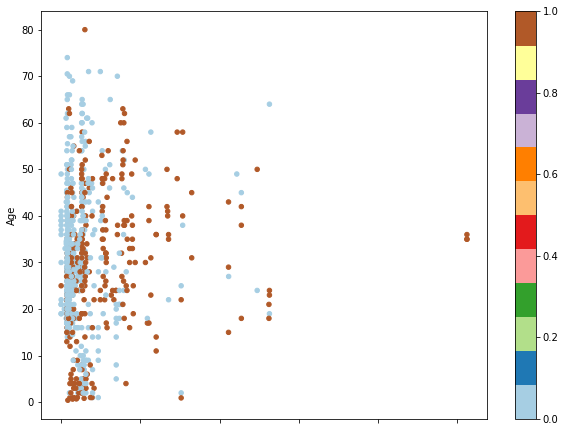

In [7]:
titanic_df.plot.scatter(x="Fare", y="Age", 
                        c=titanic_df["Survived"],
                        cmap="Paired", figsize=(10.0, 7.5))

## Ekstrakcja cech z danych tekstowych

Zbiór Titanic zawiera informację o imieniu i nazwisku każdego pasażera, ale także o tytule jakim się posługiwał. Spróbujemy wyciągnąć z tej cechy dane, które mogłyby zostać wykorzystane w modelowaniu.

In [8]:
titanic_df["Name"].unique()

array(['Mr. Owen Harris Braund',
       'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
       'Miss. Laina Heikkinen',
       'Mrs. Jacques Heath (Lily May Peel) Futrelle',
       'Mr. William Henry Allen', 'Mr. James Moran',
       'Mr. Timothy J McCarthy', 'Master. Gosta Leonard Palsson',
       'Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson',
       'Mrs. Nicholas (Adele Achem) Nasser',
       'Miss. Marguerite Rut Sandstrom', 'Miss. Elizabeth Bonnell',
       'Mr. William Henry Saundercock', 'Mr. Anders Johan Andersson',
       'Miss. Hulda Amanda Adolfina Vestrom',
       'Mrs. (Mary D Kingcome) Hewlett', 'Master. Eugene Rice',
       'Mr. Charles Eugene Williams',
       'Mrs. Julius (Emelia Maria Vandemoortele) Vander Planke',
       'Mrs. Fatima Masselmani', 'Mr. Joseph J Fynney',
       'Mr. Lawrence Beesley', 'Miss. Anna McGowan',
       'Mr. William Thompson Sloper', 'Miss. Torborg Danira Palsson',
       'Mrs. Carl Oscar (Selma Augusta Emilia Johansson) Asplund',


In [9]:
import numpy as np

In [10]:
titanic_df["Name"].str.split()

0                            [Mr., Owen, Harris, Braund]
1      [Mrs., John, Bradley, (Florence, Briggs, Thaye...
2                              [Miss., Laina, Heikkinen]
3      [Mrs., Jacques, Heath, (Lily, May, Peel), Futr...
4                           [Mr., William, Henry, Allen]
                             ...                        
882                             [Rev., Juozas, Montvila]
883                     [Miss., Margaret, Edith, Graham]
884                  [Miss., Catherine, Helen, Johnston]
885                            [Mr., Karl, Howell, Behr]
886                               [Mr., Patrick, Dooley]
Name: Name, Length: 887, dtype: object

In [11]:
titanic_df["Name"].str.split() \
    .explode()

0          Mr.
0         Owen
0       Harris
0       Braund
1         Mrs.
        ...   
885     Howell
885       Behr
886        Mr.
886    Patrick
886     Dooley
Name: Name, Length: 3536, dtype: object

In [12]:
phrase_counts = titanic_df["Name"].str.split() \
    .explode() \
    .value_counts() \
    .sort_values(ascending=False)
phrase_counts

Mr.          513
Miss.        182
Mrs.         125
William       62
John          44
            ... 
Sante          1
Rekic          1
Kilgannon      1
Byles          1
Barber         1
Name: Name, Length: 1580, dtype: int64

In [13]:
phrase_counts[phrase_counts.index.str.endswith(".")]

Mr.          513
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
L.             1
Countess.      1
Jonkheer.      1
Ms.            1
Don.           1
Mme.           1
Capt.          1
Lady.          1
Sir.           1
Name: Name, dtype: int64

In [14]:
phrase_counts[
    phrase_counts.index.str.endswith(".") & \
    (phrase_counts > 2)
]

Mr.        513
Miss.      182
Mrs.       125
Master.     40
Dr.          7
Rev.         6
Name: Name, dtype: int64

In [20]:
titles = phrase_counts[
    phrase_counts.index.str.endswith(".") & \
    (phrase_counts > 2)
].index

for title in titles:
    titanic_df[title] = titanic_df["Name"].str.contains(title,
                                                        regex=False)

### Liczba imion pasażera

Patrząc na zróżnicowanie liczby imion pomiędzy poszczególnymi pasażerami, wartym uwagi wydaje się być dodanie tej informacji do zbioru.

In [24]:
titanic_df["Names_count"] = titanic_df["Name"].str.split().apply(len)

In [25]:
titanic_df.sample(n=5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
717,0,3,Mr. Svend Lauritz Jensen,male,17.0,1,0,7.0542,True,False,False,False,False,False,4
391,1,1,Miss. Marjorie Newell,female,23.0,1,0,113.2750,False,True,False,False,False,False,3
666,1,1,Mrs. Elmer Zebley (Juliet Cummins Wright) Taylor,female,48.0,1,0,52.0000,False,False,True,False,False,False,7
557,0,3,Mr. Thomas Rowan Morrow,male,30.0,0,0,7.7500,True,False,False,False,False,False,4
260,0,1,Mr. Emil Taussig,male,52.0,1,1,79.6500,True,False,False,False,False,False,3


In [27]:
titanic_df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814


## Zapis wstępnie przetworzonych danych

Stworzyliśmy kilka dodatkowych cech, od których oczekujemy wprowadzenia nowych informacji dla dalszego klastrowania. Zapiszmy sobie stworzony zbiór, żeby móc skorzystać z niego bez konieczności powtarzania tego procesu.

In [28]:
titanic_df.to_parquet("../data/titanic-preprocessed.parquet")